# Import and Settings
### Python - 3.9.10

In [61]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from spotipy.oauth2 import SpotifyClientCredentials

In [62]:
cid = '5e6fa06773d94f1aac1b0ddb386f638a'
secret = '286bab21a6e1476da9c8ba2eaa7cdcbb'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [63]:
# Tops Songs 2020
# playlist_link = "https://open.spotify.com/playlist/37i9dQZF1EM9DVbOg6CjfI?si=f57f3dbd0c7c4342"

# Tops Songs 2021
playlist_link = "https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE?si=cb97d0c0919449a7"

playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [64]:
playlist_features_list = [
    "track_id",
    "track_name",
    "artist",
    "album",
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature"
    ]

df = pd.DataFrame(columns = playlist_features_list)
    
playlist = sp.user_playlist_tracks("spotify", playlist_URI)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df = pd.concat([df, track_df], ignore_index = True)
    
    
    results = pd.concat([df, track_df], ignore_index = True)

# results

In [65]:
lil_graph_list = results[[
    "danceability",
    "energy",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    ]]

big_graph_list = results[[
    "tempo",
    # "duration_ms",
    "key",
    "loudness",
    "mode",
    "time_signature"
    ]]

graph_list = results[[
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    # "time_signature"
        ]]


graph_list

,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence
0,95.977,233713,0.825,0.652,1,-3.183,0,0.0802,0,0.0931,0.931
1,171.005,200040,0.514,0.73,1,-5.934,1,0.0598,0.000095,0.0897,0.334
2,98.027,209438,0.824,0.588,6,-6.4,0,0.0924,0.000104,0.149,0.513
3,159.772,218320,0.577,0.522,5,-6.594,0,0.0984,0.00009,0.142,0.119
4,109.891,182161,0.501,0.405,1,-5.679,1,0.0319,0,0.105,0.446
...,...,...,...,...,...,...,...,...,...,...,...
96,89.976,211667,0.628,0.698,6,-5.608,0,0.105,0.00143,0.0907,0.732
97,85.03,272394,0.548,0.532,5,-7.596,1,0.0323,0.000263,0.217,0.405
98,124.959,235545,0.851,0.541,0,-6.825,1,0.0505,0,0.13,0.448
99,149.789,206880,0.752,0.754,1,-6.684,1,0.0615,0,0.0486,0.755


In [66]:
from sklearn.preprocessing import MinMaxScaler
# 
min_max_scaler = MinMaxScaler()

graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])


/var/folders/5b/n9vc6d911ps7kztqt0v3bcpc0000gn/T/ipykernel_39106/1512029370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])


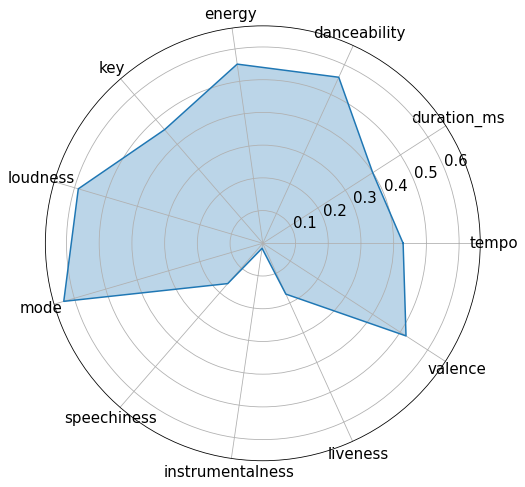

In [67]:
# plot size
fig=mpl.figure(figsize=(12,8))

# convert column names into a list
categories=list(graph_list.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(graph_list.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*3.14 for n in range(N)]
angles+=angles[:1]

# plot
mpl.polar(angles, value)
mpl.fill(angles,value,alpha=0.3)

# mpl.title('Discovery Weekly Songs Audio Features', size=35)

mpl.xticks(angles[:-1],categories, size=15)
mpl.yticks(color='black',size=15)
# mpl.style.use('dark_background') # Because dark mode everything
mpl.show()